<a href="https://colab.research.google.com/github/AmiraBelkis/Neural-Network-Reduction-via-Knowledge-Transfer/blob/main/CIFAR-100/AG_ResNet18_Cifar100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rssrc

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sat Aug 26 13:20:13 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!


# Importer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Bibliothèques

In [ ]:
import random
import string
import torch
from torch import nn
import torch.nn.utils.prune as prune
import torch.nn.functional as F
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
import matplotlib.colors as colors
import numpy as np
from copy import deepcopy

In [ ]:
import AG

100%|██████████| 169001437/169001437 [00:02<00:00, 64948335.26it/s]


Extracting ./data/cifar-100-python.tar.gz to ./data
Files already downloaded and verified


In [ ]:
import importlib
import global_param
importlib.reload(global_param)
importlib.reload(AG)

Files already downloaded and verified
Files already downloaded and verified


<module 'AG' from '/content/AG.py'>

# AG

In [ ]:
model_path = '/content/drive/Shareddrives/PFE 22 23 Feliachi et Frioui/..Tests/Models/Cifar-100/resnet18_cifar_100'
model_base = torch.load(model_path)

In [ ]:
AG.evaluation_2(model_base , nn.CrossEntropyLoss())

Accuracy: 80.80%
Loss: 0.6476


(0.808, 0.6475963953194345)

## Méthode AG

In [ ]:
save_to = '/content/drive/Shareddrives/PFE 22 23 Feliachi et Frioui/..Tests/Cifar-100/ResNet18v2/'
os.makedirs(save_to, exist_ok=True)
os.makedirs(save_to +'children/', exist_ok=True)
os.makedirs(save_to +'parents/', exist_ok=True)
os.makedirs(save_to +'kd/', exist_ok=True)
os.makedirs(save_to +'kd/training/', exist_ok=True)

Generating the initial population :
     - individual 0 ----------- 100%
     - individual 1 ----------- 100%
     - individual 2 ----------- 100%
     - individual 3 ----------- 100%
     - individual 4 ----------- 100%
     - individual 5 ----------- 100%
     - individual 6 ----------- 100%
     - individual 7 ----------- 100%
Performing KD on the initial population :
------------------------------ Training 1 ---------------------------------
Epoch 0/4
----------
train Loss: 2.1017 Acc: 0.0414
val Loss: 1.9675 Acc: 0.0682

Epoch 1/4
----------
train Loss: 1.8982 Acc: 0.0977
val Loss: 1.8202 Acc: 0.1212

Epoch 2/4
----------
train Loss: 1.7693 Acc: 0.1489
val Loss: 1.7095 Acc: 0.1778

Epoch 3/4
----------
train Loss: 1.6625 Acc: 0.2020
val Loss: 1.6126 Acc: 0.2215

Epoch 4/4
----------
train Loss: 1.5808 Acc: 0.2469
val Loss: 1.5452 Acc: 0.2614

Training complete in 22m 14s
Best val Acc: 0.261400
------------------------------ Training 2 ---------------------------------
Epoch 0/4
--

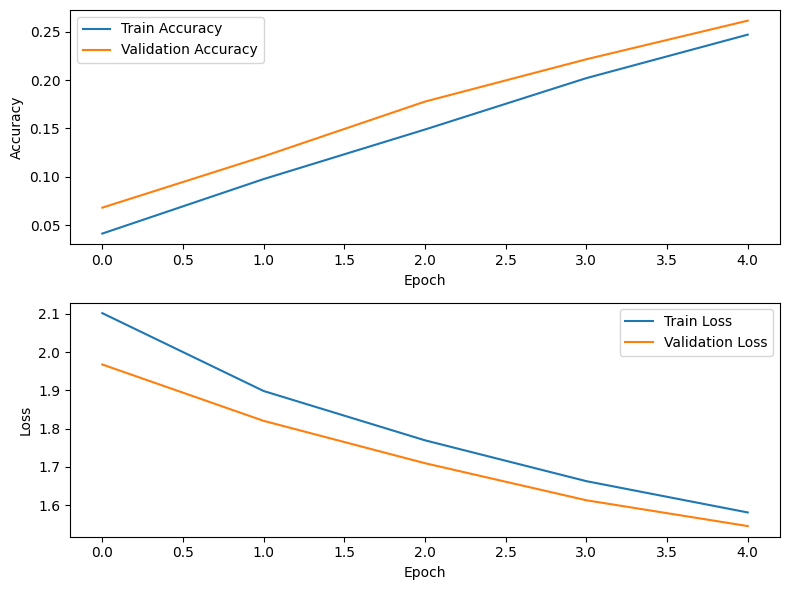

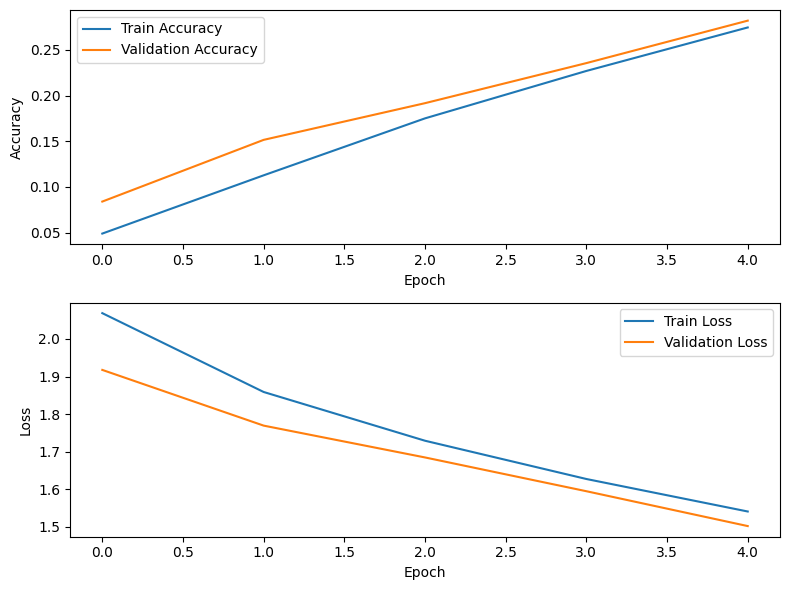

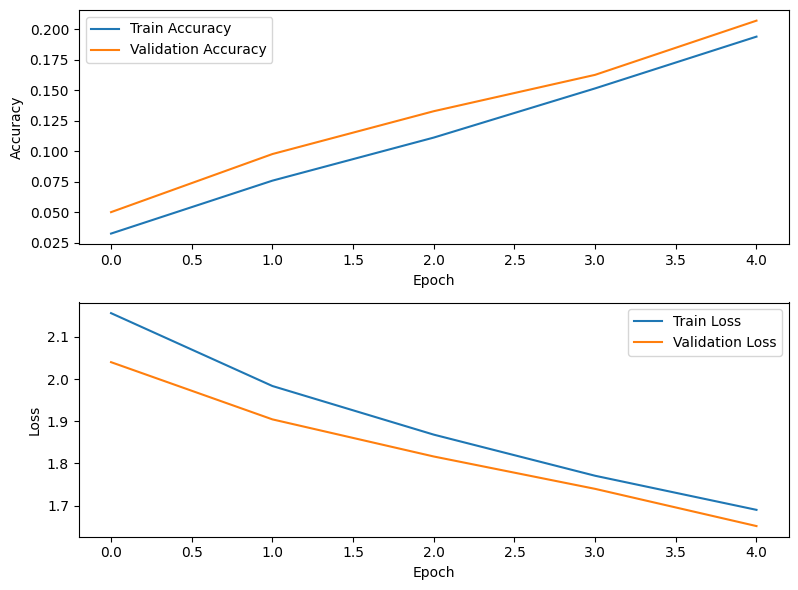

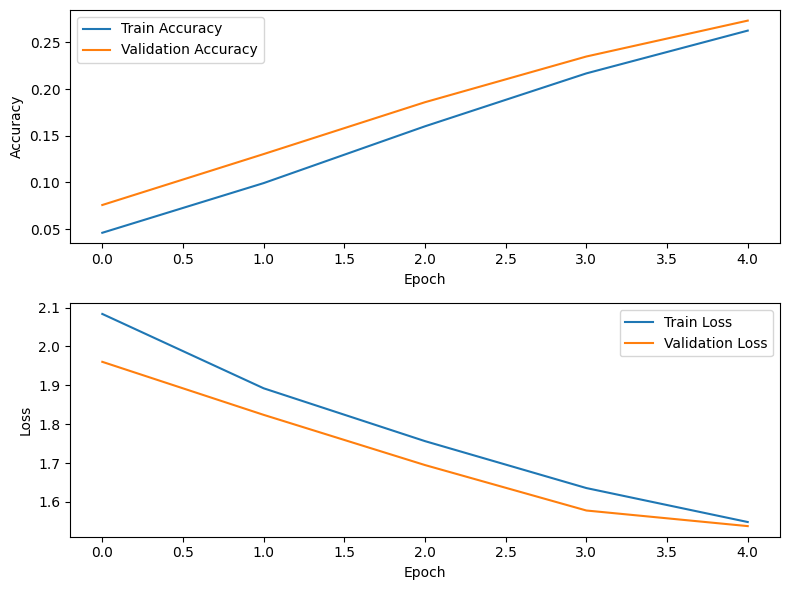

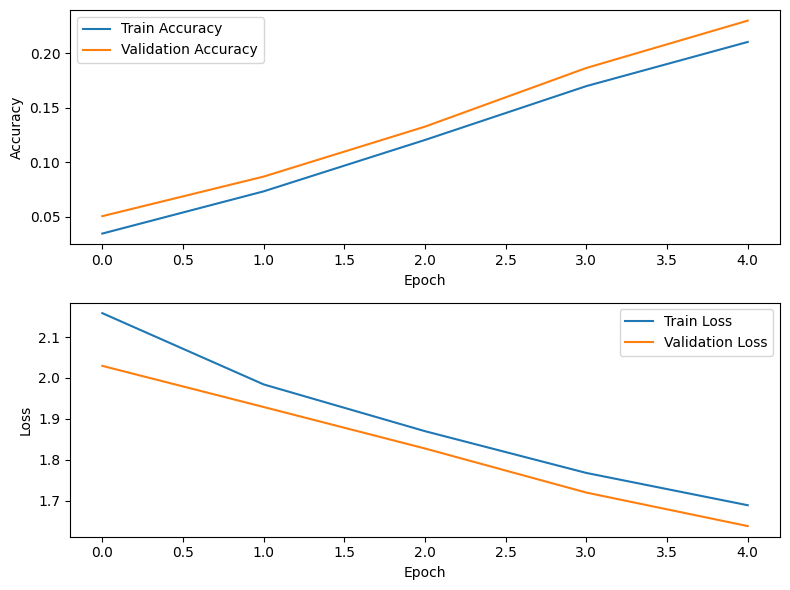

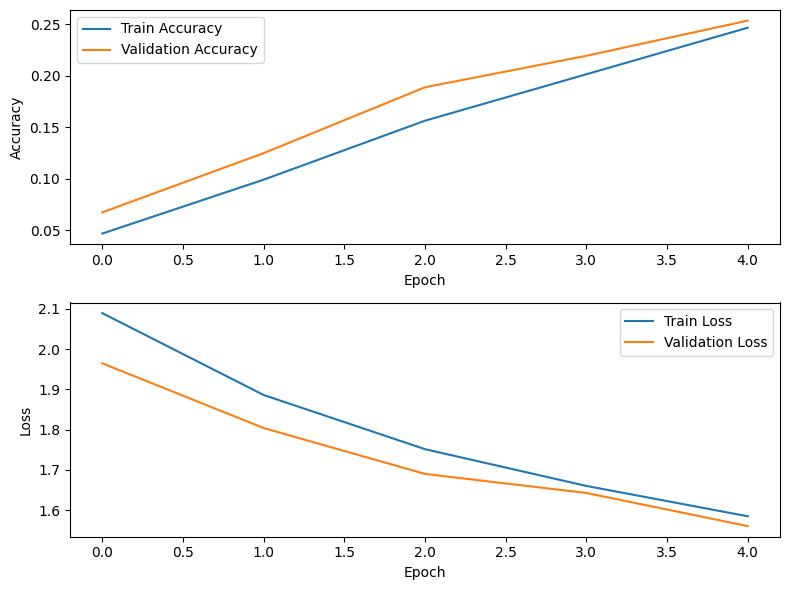

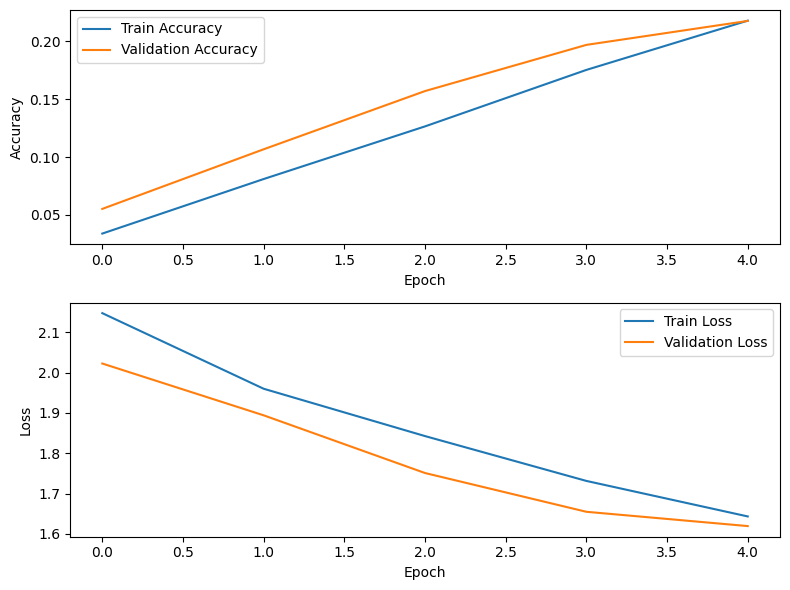

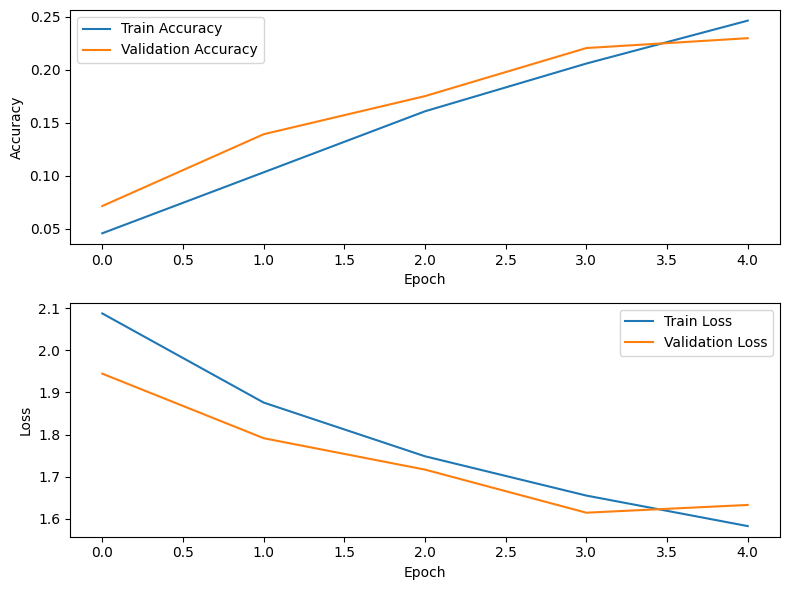

/*-----------------------------*/
/*         iteration 1        */
/*----------------------------*/
   * Select parent for crossing:
       - Selection --------------- 100%
   * Offspring:
       - Crossover:
           mask : [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0]
       - mutation:
       - Crossover:
           mask : [0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1]
       - Performing KD on the children :
------------------------------ Training 1 ---------------------------------
Epoch 0/4
----------
train Loss: 1.9385 Acc: 0.0910
val Loss: 1.7766 Acc: 0.1389

Epoch 1/4
----------
train Loss: 1.7063 Acc: 0.1786
val Loss: 1.7060 Acc: 0.1759

Epoch 2/4
----------
train Loss: 1.5896 Acc: 0.2380
val Loss: 1.5441 Acc: 0.2539

Epoch 3/4
----------
train Loss: 1.5105 Acc: 0.2834
val Loss: 1.5017 Acc: 0.2864

Epoch 4/4
----------
tr

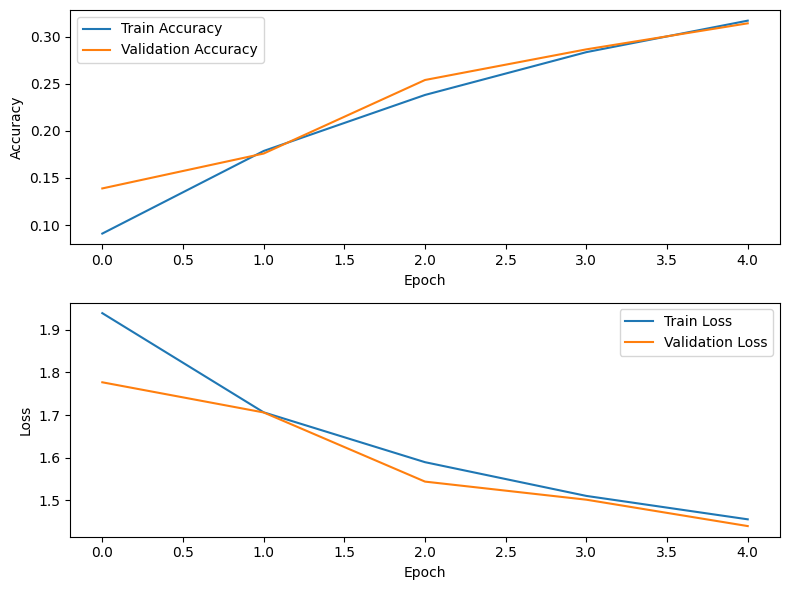

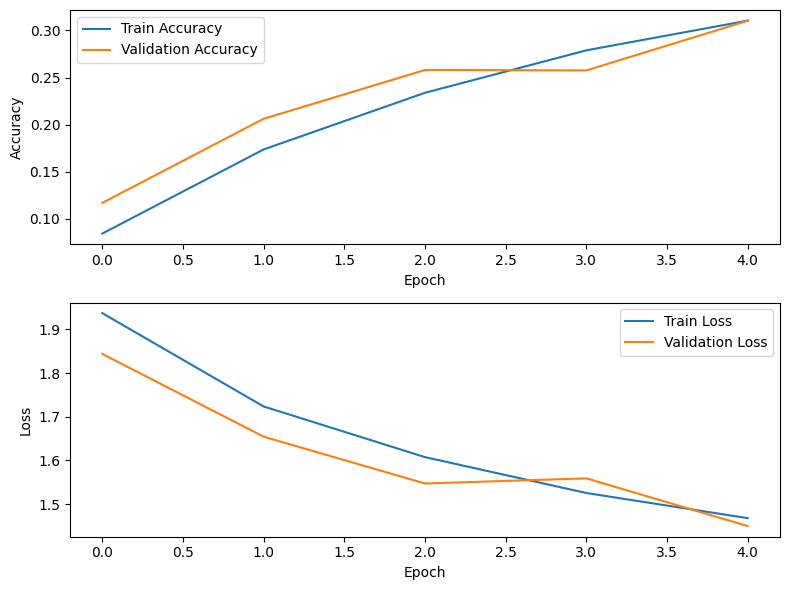

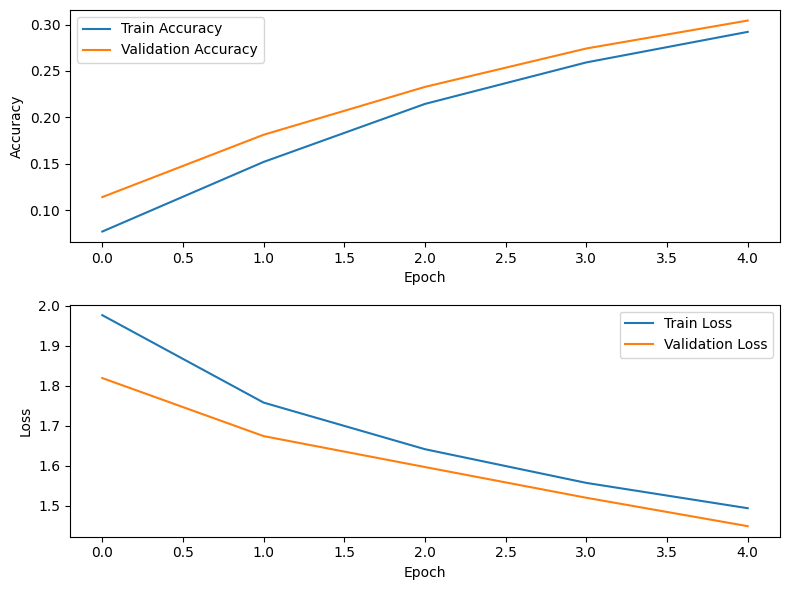

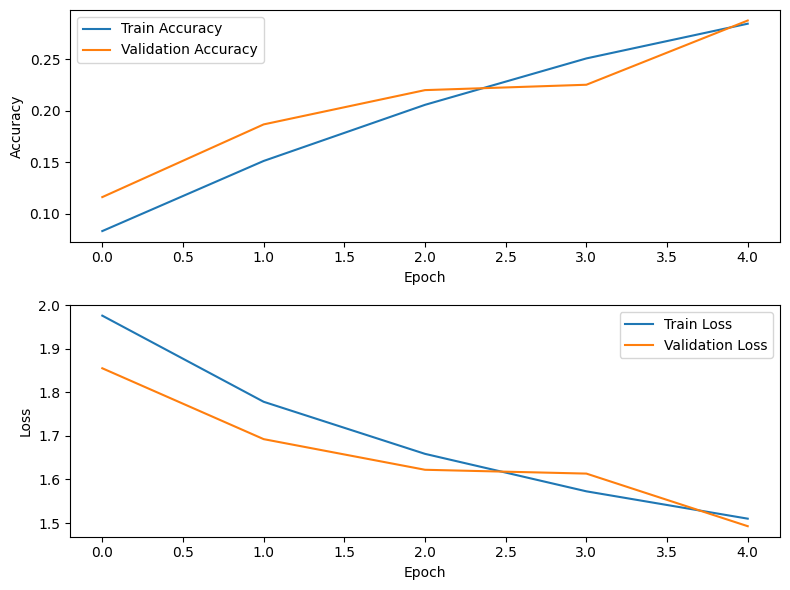

/*-----------------------------*/
/*         iteration 2        */
/*----------------------------*/
   * Select parent for crossing:
       - Selection --------------- 100%
   * Offspring:
       - Crossover:
           mask : [0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1]
       - Crossover:
           mask : [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1]
       - Performing KD on the children :
------------------------------ Training 1 ---------------------------------
Epoch 0/4
----------
train Loss: 1.9958 Acc: 0.0683
val Loss: 1.8602 Acc: 0.1073

Epoch 1/4
----------
train Loss: 1.7886 Acc: 0.1414
val Loss: 1.7667 Acc: 0.1538

Epoch 2/4
----------
train Loss: 1.6840 Acc: 0.1920
val Loss: 1.6654 Acc: 0.2003

Epoch 3/4
----------
train Loss: 1.6129 Acc: 0.2284
val Loss: 1.6718 Acc: 0.2042

Epoch 4/4
----------
train Loss: 1.5569 Ac

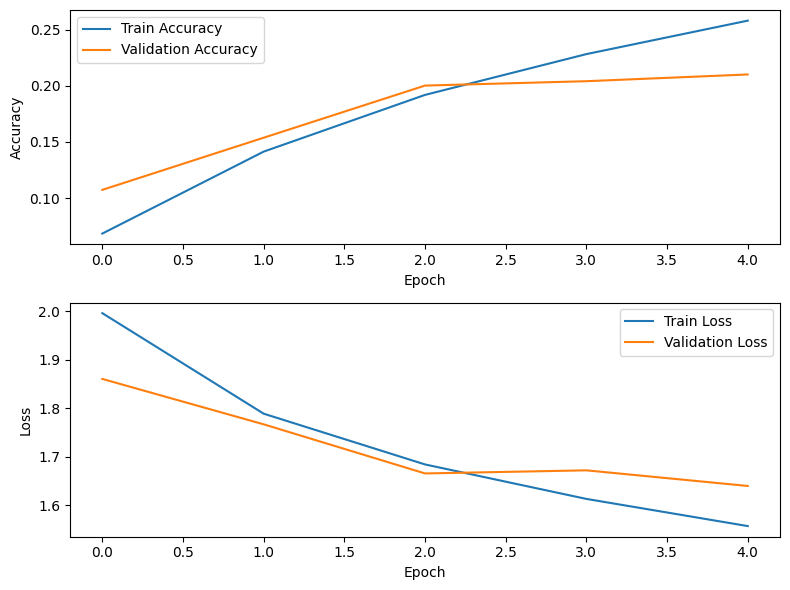

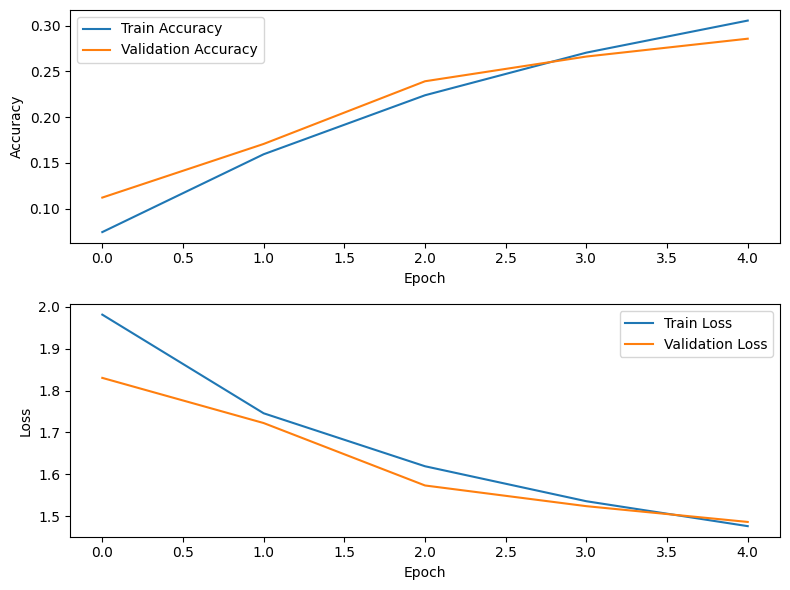

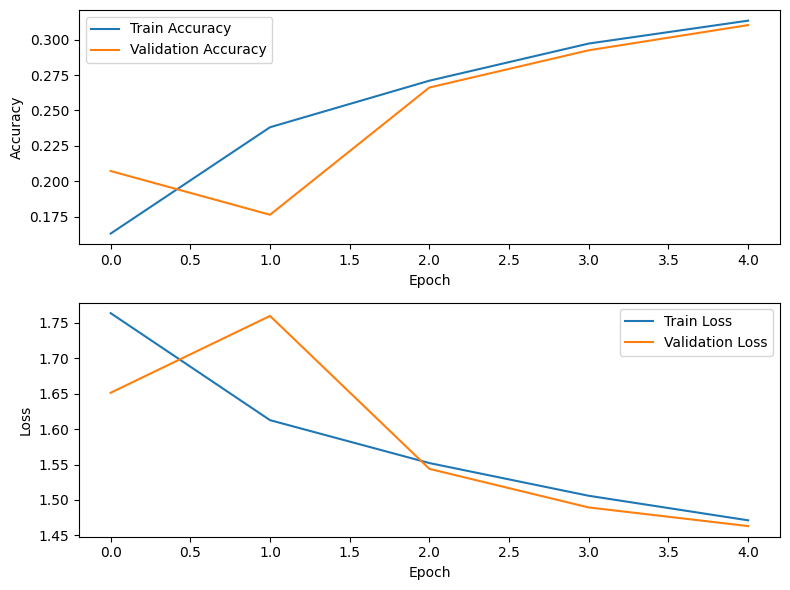

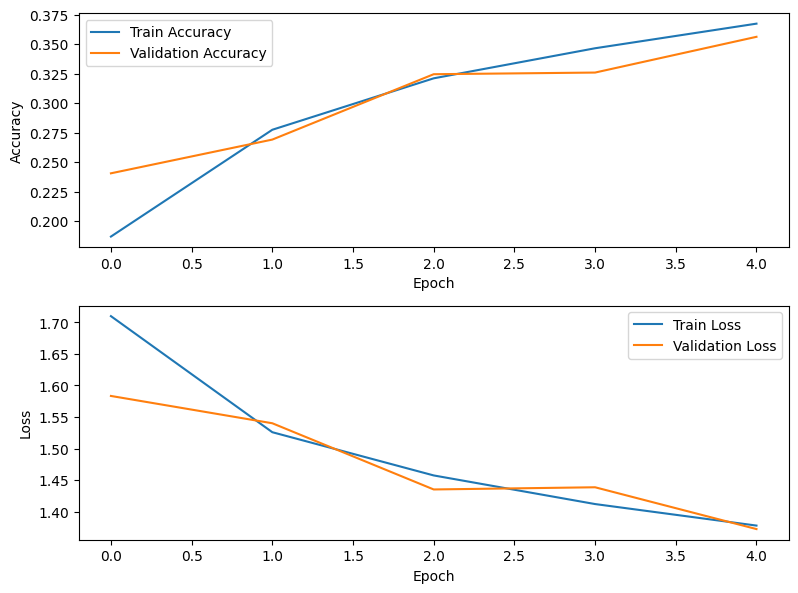

Select the winning ticket from final population
  - Selection --------------- 100%


In [ ]:
winning_ticket = AG.AG_method(model_base, save_to, nb_itr = 2, N = 8 ,pruning_rate = 0.85, pruning_space = 0.05,kd_epoch = 5)

##  Évaluer le ticket gagnant

In [ ]:
winning_ticket = torch.load( save_to + 'winning_ticket')

In [ ]:
AG.calculate_sparsity(winning_ticket)

tensor(0.8537, device='cuda:0')

In [ ]:
AG.evaluation_2(winning_ticket, nn.CrossEntropyLoss())

Accuracy: 35.63%
Loss: 2.4211


(0.3563, 2.421078436693568)

In [ ]:
data = AG.dataloaders['val']
for in_ , lbl in data:
  in_ = in_.to(AG.device)
  lbl = lbl.to(AG.device)
  out = winning_ticket(in_)
  _, preds = torch.max(out, 1)
  print(preds)
  print('-'*10)
  print(lbl)
  print('-'*10)
  print(preds-lbl)
  break

## Effectuer la distillation des connaissances pendant des epochs supplémentaires.

In [ ]:
import global_param

In [ ]:
model_path = '/content/drive/Shareddrives/PFE 22 23 Feliachi et Frioui/..Tests/Models/Cifar-100/resnet18_cifar_100'
model_base = torch.load(model_path)

In [ ]:
save_to = '/content/drive/Shareddrives/PFE 22 23 Feliachi et Frioui/..Tests/Cifar-100/ResNet18v2/'
winning_ticket = torch.load( save_to + 'winning_ticket')

In [ ]:
criterion = AG.SoftHardTargetLoss(global_param.soft_citerion,global_param.hard_citerion, global_param.soft_purcntg, global_param.hard_purcntg)

optimizer_conv = global_param.Optimizer(winning_ticket)

exp_lr_scheduler = global_param.Scheduler(optimizer_conv)
print("------------------------------ Training ---------------------------------")
# Train the model
winning_ticket, statics = AG.train_model_kd_mix(winning_ticket,model_base, criterion, optimizer_conv,exp_lr_scheduler, num_epochs=15)

------------------------------ Training ---------------------------------
Epoch 0/14
----------
train Loss: 1.3500 Acc: 0.3863
val Loss: 1.3781 Acc: 0.3619

Epoch 1/14
----------
train Loss: 1.3265 Acc: 0.3976
val Loss: 1.3369 Acc: 0.3777

Epoch 2/14
----------
train Loss: 1.3052 Acc: 0.4131
val Loss: 1.3265 Acc: 0.3913

Epoch 3/14
----------
train Loss: 1.2893 Acc: 0.4253
val Loss: 1.3082 Acc: 0.3958

Epoch 4/14
----------
train Loss: 1.2728 Acc: 0.4333
val Loss: 1.2880 Acc: 0.4089

Epoch 5/14
----------
train Loss: 1.2596 Acc: 0.4411
val Loss: 1.2723 Acc: 0.4191

Epoch 6/14
----------
train Loss: 1.2487 Acc: 0.4502
val Loss: 1.2802 Acc: 0.4169

Epoch 7/14
----------
train Loss: 1.2003 Acc: 0.4820
val Loss: 1.2134 Acc: 0.4538

Epoch 8/14
----------
train Loss: 1.1899 Acc: 0.4909
val Loss: 1.2114 Acc: 0.4517

Epoch 9/14
----------
train Loss: 1.1864 Acc: 0.4931
val Loss: 1.2096 Acc: 0.4531

Epoch 10/14
----------
train Loss: 1.1854 Acc: 0.4926
val Loss: 1.2093 Acc: 0.4553

Epoch 11/14


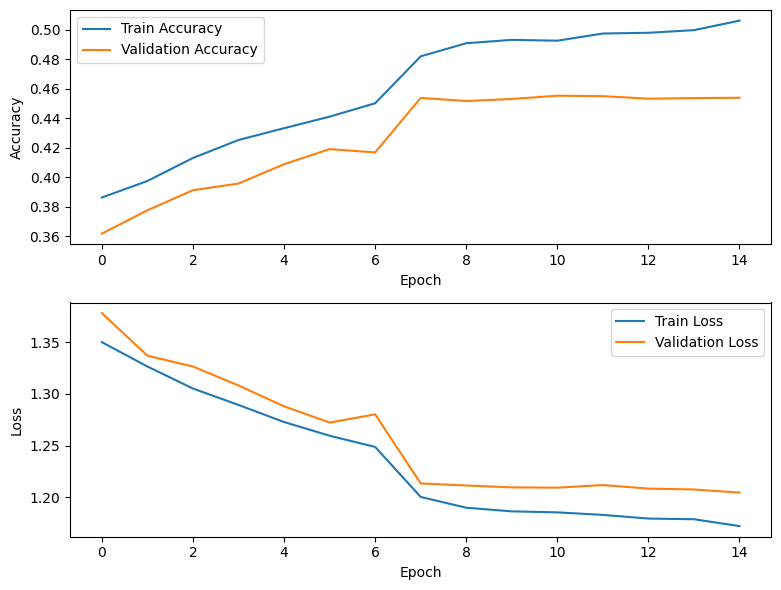

In [ ]:
AG.show_statics_training(statics, save_to + 'winning_ticket')

In [ ]:
AG.evaluation_2(winning_ticket, nn.CrossEntropyLoss())

Accuracy: 45.53%
Loss: 1.9906


(0.4553, 1.9905918646769918)

In [ ]:
torch.save(winning_ticket, save_to + 'winning_ticket')